In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [2]:
dermatoDataset = pd.read_csv("/home/tina/Downloads/dermatology_database_1.csv")
dermatoDataset.age.replace("?", 36.0, inplace=True)
dermatoDataset['class'] = dermatoDataset['class'].values + 1

In [3]:
y = np.asarray(dermatoDataset["class"].values)
X = np.asarray(dermatoDataset.drop("class", axis=1).values.astype(float))

In [4]:
X2, X_test, y2, y_test = train_test_split(X, y, test_size=0.1,random_state=20,shuffle=True,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=20,shuffle=True,stratify=y)

In [5]:
decision_tree_model = DecisionTreeClassifier(random_state=20)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=20)

In [6]:
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [7]:
print("accuracy =>", accuracy)

accuracy => 0.918918918918919


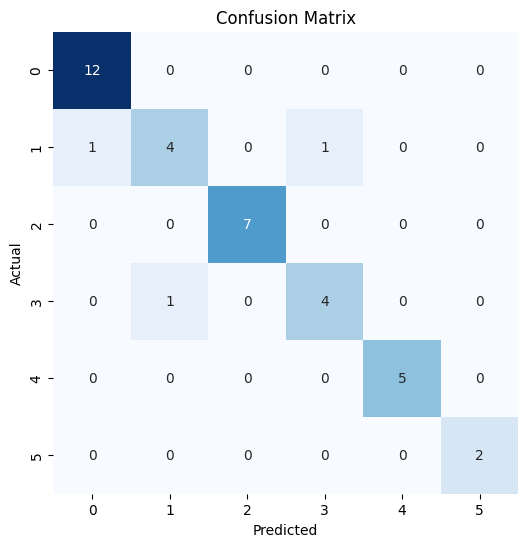

In [8]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 91.89%
